In [1]:
import numpy as np
import pandas as pd
import os
import random
import copy
from PIL import Image
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
folders = [        # Folder where spacenet segmentation results are held in subfolders
        r"",
        r"",
        r"",
        r""
        ] 
spacenet_folder = r"" # spacenet data folder

In [3]:
combinations = list(itertools.product([3,5,7],[1,2,3],['GlorotNormal','NovelMethod']))
columns=['epoch','loss','f1','iou','val_loss','val_f1','val_iou']
arrs = {arr[:-4]:pd.read_csv(os.path.join(folders[0],arr),header=None,skiprows=1,names=columns) for arr in os.listdir(folders[0]) if arr[0]=='h'}
for key,arr in arrs.items():
    arr.drop(arr.tail(1).index,inplace=True)

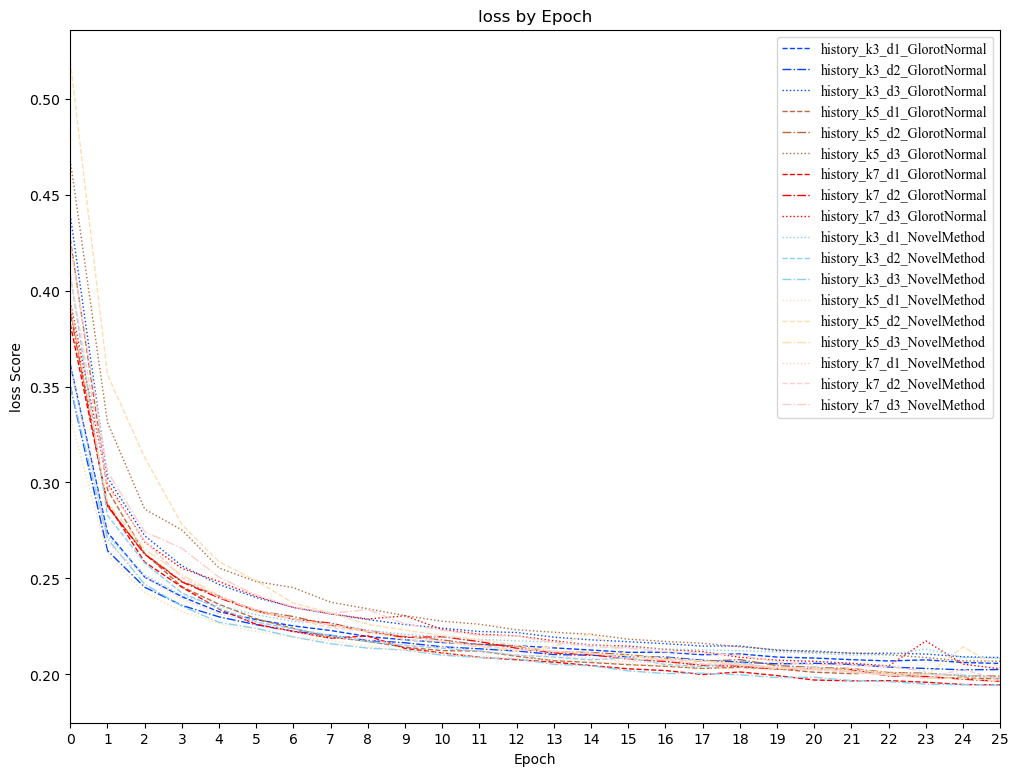

In [4]:
score = 'loss'
combinations_gen = list(itertools.product(['Conventional,','Novel Method,'],['3x3,','5x5,','7x7,'],['Dilation 1','Dilation 2','Dilation 3']))
combinations = []
for combo in combinations_gen:
    string = ''
    for item in combo:
        string = string+str(item)+" "
    combinations.append(string)
plt.figure(figsize=(12,9))
dashes = ['--',':','-.']*6
colors_c = ['#0044ff']*3+['#b66b3e']*3+['#ff0000']*3
colors_n = ['#89cff0']*3+['#FFDDAF']*3+['#FFCCCB']*3
titles = []
for i,values in zip(enumerate(arrs),arrs.values()):
    if i[0]%2==0:
        plt.plot(values['epoch'],values[score],dashes[i[0]],color=colors_c[i[0]//2],lw=1)
        titles.append(i[1])
for i,values in zip(enumerate(arrs),arrs.values()):
    if i[0]%2!=0:
        plt.plot(values['epoch'],values[score],dashes[i[0]],color=colors_n[i[0]//2],lw=1)
        titles.append(i[1])
# plt.ylim([0, 1])
plt.xlim(0,25)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(titles);
plt.title(f"{score} by Epoch");
plt.xlabel("Epoch");
plt.ylabel(f"{score} Score");
# plt.savefig('training_loss_by_epoch.png')

In [ ]:
## Horizontal - old
# combinations = list(itertools.product([3,5,7],[1,2,3],['GlorotNormal','NovelMethod']))
# combinations = [str(item) for item in combinations]
# colors = ['#10A5F5','#89cff0']*3+['#D2B48C','#FFDDAF']*3+['#FF8886','#FFCCCB']*3
# values = [arrs[i]['val_f1'][0] for i in range(len(combinations))]
# n = [i for i in range(len(combinations))]
# plt.figure(figsize=(10,7));
# plt.bar(combinations,values,color=colors);
# plt.ylim([0.0, 1.0])
# plt.xticks([]);
# for i in range(len(combinations)):
#     plt.annotate(str(combinations[i]), xy=(n[i],values[i]/2), ha='center', va='center',rotation=90)

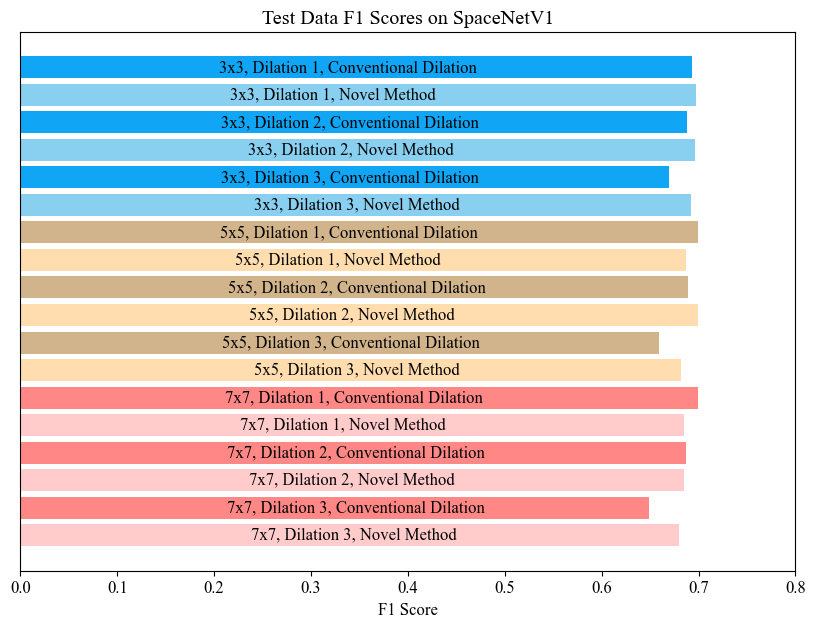

In [13]:
combinations_gen = list(itertools.product(['3x3,','5x5,','7x7,'],['Dilation 1,','Dilation 2,','Dilation 3,'],['Conventional Dilation','Novel Method']))
combinations = []
for combo in combinations_gen:
    string = ''
    for item in combo:
        string = string+str(item)+" "
    combinations.append(string)
combinations.reverse()
colors = ['#10A5F5','#89cff0']*3+['#D2B48C','#FFDDAF']*3+['#FF8886','#FFCCCB']*3
colors.reverse()

# ### Calcuate for single run
# results = {arr[:-4]:pd.read_csv(os.path.join(folders[0],arr),header=None,skiprows=1,names=columns).tail(1) for arr in os.listdir(folders[0]) if arr[0]=='h'}
# for key,result in results.items():
#     result['epoch'] = result.index
# values = [np.asarray(results[f'history_k{k}_d{d}_{w}']['val_f1'])[0] for k,d,w in list(itertools.product([3,5,7],[1,2,3],["GlorotNormal","NovelMethod"]))]
# n = [i for i in range(len(combinations))]
# plt.figure(figsize=(10,7));
# plt.barh(combinations,values,color=colors);
# plt.xlim([0.0, 0.8])
# plt.yticks([]);
# plt.title("Test Data F1 Scores on SpaceNetV1 Data")
# for i in range(len(combinations)):
#     plt.annotate(str(combinations[i]), xy=(values[i]/2,n[i]), ha='center', va='center',color='black')
# plt.xlabel("F1 Score");



### Average Across Multiple Runs
columns=['epoch','loss','f1','iou','val_loss','val_f1','val_iou']
values_list = []
for folder in folders:
    filenames = [arr[:-4] for arr in os.listdir(folder) if arr[0]=='h']
    results = {file:pd.read_csv(os.path.join(folder,f"{file}.csv"),header=None,skiprows=1,names=columns).tail(1) for file in filenames}
    values = {f"k{k}_d{d}_{w}":np.asarray(results[f'history_k{k}_d{d}_{w}']['val_f1'])[0] for k,d,w in list(itertools.product([3,5,7],[1,2,3],["GlorotNormal","NovelMethod"]))}
    values_list.append(values)
numerator = copy.deepcopy(values_list[0])
for dictx in values_list[1:]:
    for key, value in dictx.items():
        numerator[key] += value
averages = {}
for key, value in numerator.items():
    averages[key] = value/len(folders)

n = [i for i in range(len(combinations))]
plt.figure(figsize=(10,7));
out_values = list(averages.values())
out_values.reverse()
plt.barh(n,out_values,color=colors);
plt.xlim([0.0, 0.8])
plt.yticks([]);
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.title("Test Data F1 Scores on SpaceNetV1")
for i in range(len(combinations)):
    plt.annotate(str(combinations[i]), xy=(list(averages.values())[i]/2,n[i]), ha='center', va='center',color='black')
plt.xlabel("F1 Score",fontsize=12);
# plt.savefig('f1_data_bar_chart.png')

In [ ]:
top_folder = folders[0]
folders_x = [x[0] for x in os.walk(top_folder)]
folders_x = folders[1:]
combinations = [folder.split("\\")[-1] for folder in folders_x]
combinations_n = [x for x in combinations if x.endswith('d')]
combinations_n_split = [item.split("_") for item in combinations if item.split("_")[-1].startswith('N')]
combinations_c = [x for x in combinations if x.endswith('l')]
combinations_c_split = [item.split("_") for item in combinations if item.split("_")[-1].startswith('G')]

originals,masks = {},{}
for folder in folders_x:
    files = os.listdir(folder)
    for file in files:
        img = Image.open(os.path.join(spacenet_folder,r"DL_chips\images_out_aug",f"{file[5:-4]}.jpg"))
        arr = np.array(img)
        originals[file[5:-4]] = arr/255
        mask = Image.open(os.path.join(spacenet_folder,r"DL_chips\labels_out2_aug",f"{file[5:-4]}.jpg"))
        maskarr = np.array(mask)
        masks[file[5:-4]] = maskarr

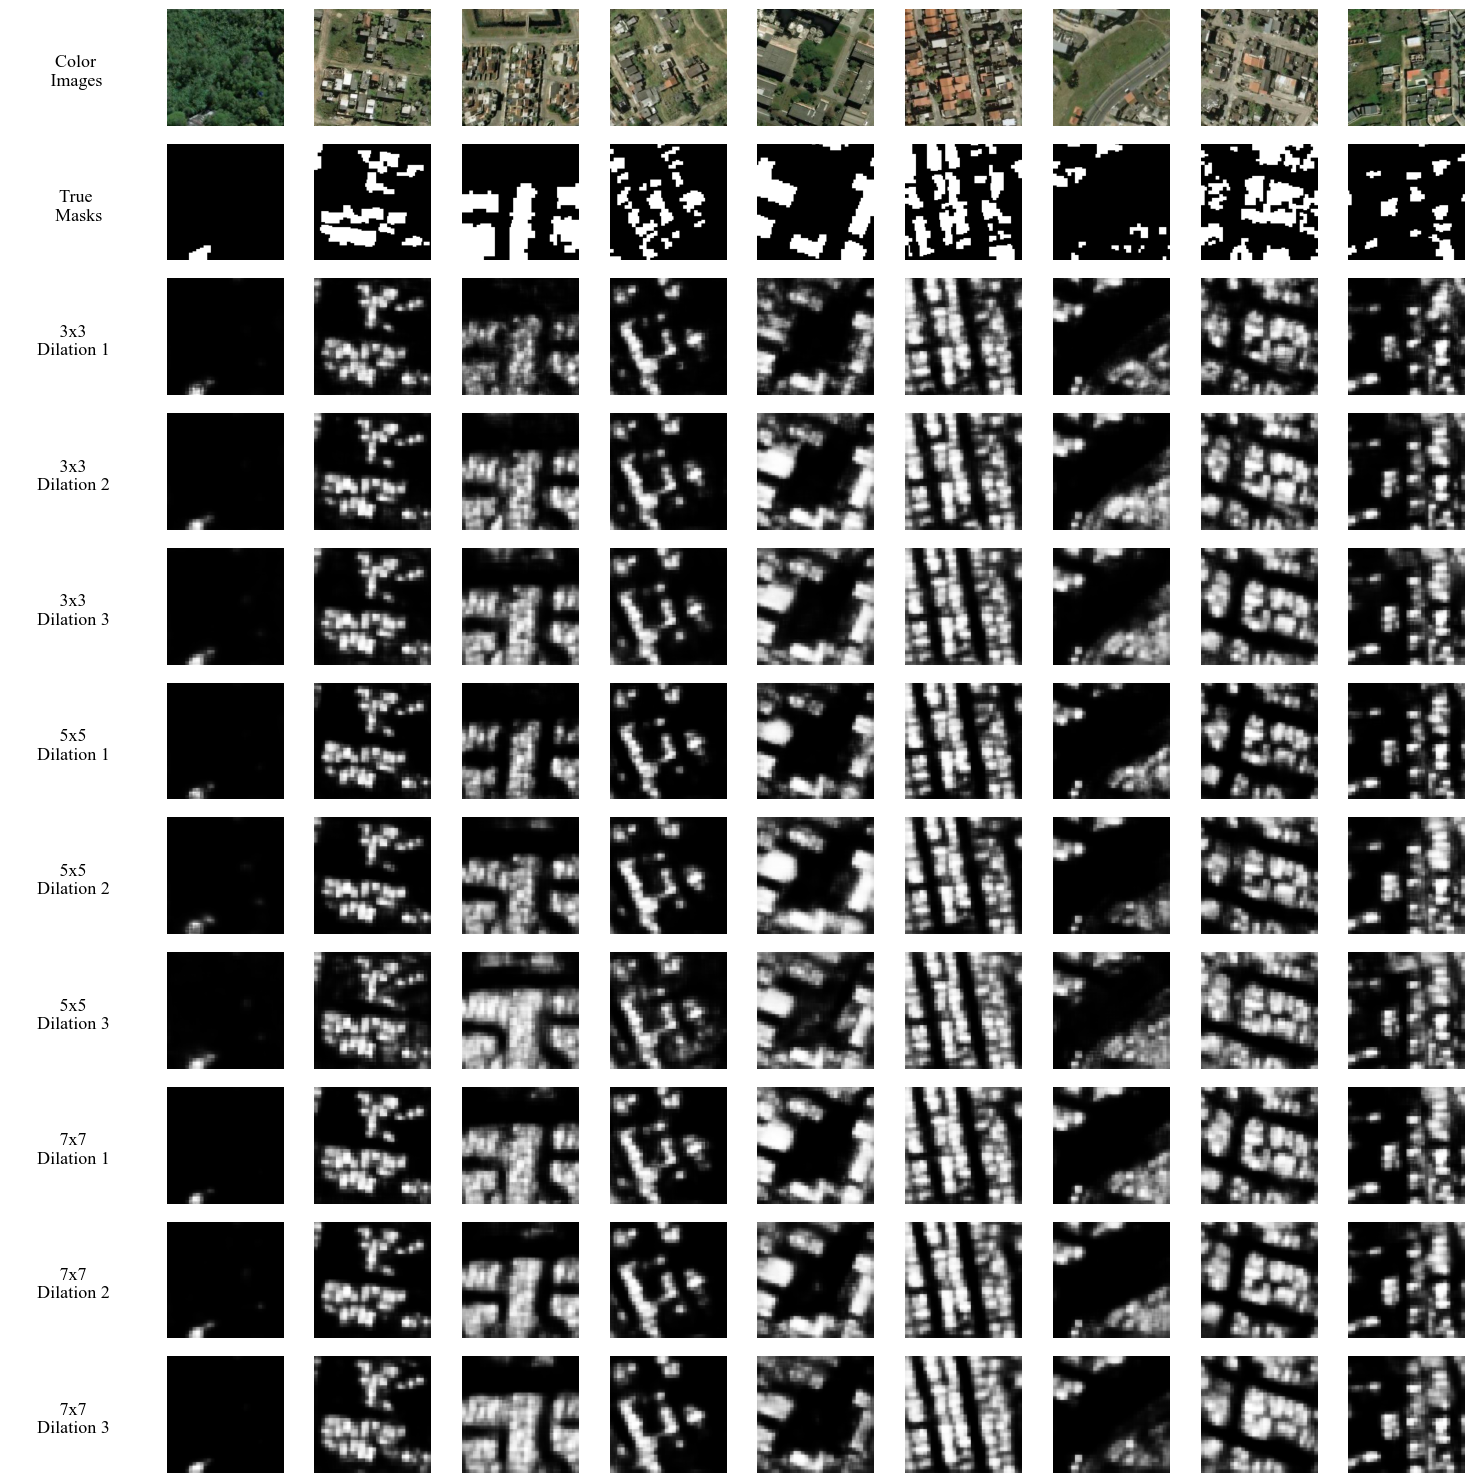

In [15]:
combotype = combinations_n

titles = list(itertools.product(['3x3','5x5','7x7'],['Dilation 1','Dilation 2','Dilation 3']))
nrows = len(combotype)+2
ncols = 10
cols = list(originals.keys())
randoms = []
random.seed(101+5)
for r in range(ncols):
    randoms.append(random.randint(0,len(cols)))    
cols = [cols[r] for r in randoms]

fig, axs = plt.subplots(nrows,ncols,figsize=(15,15),clip_on=False)
plt.grid(True)

row_titles = ["    Color\n   Images", "     True\n    Masks"]+[f"     {x[0]}\n{x[1]}" for x in titles]

cmap='gray'
for col in range(ncols):
    for row in range(nrows):
        axs[row,col].axis("off")
    if col == 0:
        for row in range(nrows):
            axs[row,0].text(0.2,0.35,row_titles[row],fontsize=13)
        continue
    original = originals[cols[col]]
    axs[0,col].imshow(original)
    mask = masks[cols[col]]
    mask_arr = np.array(mask)
    mask_arr[mask_arr != 0] = 1
    axs[1,col].imshow(mask_arr,cmap=cmap)
    for row in range(len(combotype)):
        pred = np.load(os.path.join(top_folder,combotype[row],"pred_"+cols[col]+".npy"))
        # pred = np.argmax(combinations_c[row], axis=-1)
        # pred = np.expand_dims(pred, axis=-1)
        axs[2+row,col].imshow(pred,cmap=cmap)

plt.tight_layout()
# fig.savefig('__spacenet_ae.png')
# plt.show()